In [ ]:
#upload the kaggle json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d safiullah007/leaf-disease

100% 2.01G/2.01G [01:57<00:00, 23.3MB/s]
100% 2.01G/2.01G [01:57<00:00, 18.3MB/s]


In [ ]:
# unzip the file
import zipfile
zip_ref = zipfile.ZipFile('/content/leaf-disease.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
!ls

'CCMT Dataset'		   kaggle.json	      sample_data
'CCMT dataset(Grab_Cut)'   leaf-disease.zip


In [ ]:
def accuracy_curve():
  h = history
#plot the accuracy value
  plt.plot(h.history['accuracy'],label='train accuracy')
  plt.plot(h.history['val_accuracy'],label = 'validation accuracy')
  plt.legend()
  plt.show()

def loss_curve():
  #plot the loss value
    h = history
    plt.plot(h.history['loss'],label = 'train loss')
    plt.plot(h.history['val_loss'],label = 'validation loss')
    plt.legend()
    plt.show()

In [ ]:
def performance_measure():

  # Make predictions on the test data
  y_pred = model.predict(x_test)

  # Convert one-hot encoded predictions back to class labels
  y_pred_labels = np.argmax(y_pred, axis=1)

  # Calculate accuracy
  accuracy = accuracy_score(y_test, y_pred_labels)
  print("Accuracy:", accuracy)

  # Calculate precision, recall, and F1-score for each class
  precision = precision_score(y_test, y_pred_labels, average='macro')
  recall = recall_score(y_test, y_pred_labels, average='macro')
  f1 = f1_score(y_test, y_pred_labels, average='macro')

  print("Precision:", precision)
  print("Recall:", recall)
  print("F1 Score:", f1)

In [ ]:
def confusion_matrices():
    # Assuming you have already trained your classification model and obtained predictions.
  # Replace 'model' and 'test_data' with your actual model and test data.

  # Make predictions on the test data
  y_pred = model.predict(x_test)

  # Convert one-hot encoded predictions back to class labels
  y_pred_labels = np.argmax(y_pred, axis=1)

  # Calculate the confusion matrix
  cm = confusion_matrix(y_test, y_pred_labels)

  # Display the confusion matrix as a heatmap
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

In [ ]:
def output_checking():
  accuracy_curve()
  loss_curve()
  performance_measure()
  confusion_matrices()

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
import io
from PIL import Image
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
def normalize_image(image):
    image = image.astype(np.float32)
    image = (image - np.min(image)) / (np.max(image) - np.min(image))
    return image

In [ ]:
# Define classes and subclasses
classes = ['Cashew', 'Cassava', 'Maize', 'Tomato']
subclasses = {
    'Cashew': ['anthracnose', 'gumosis', 'healthy', 'leaf miner', 'red rust'],
    'Cassava': ['bacterial blight', 'brown spot', 'green mite', 'healthy', 'mosaic'],
    'Maize': ['fall armyworm', 'grasshopper', 'healthy', 'leaf beetle', 'leaf blight', 'leaf spot', 'streak virus'],
    'Tomato': ['healthy', 'leaf blight', 'leaf curl', 'septoria leaf spot', 'verticulium wilt']
}

data = []  # To store images as arrays
labels = []  # To store labels
main_folder = '/content/CCMT dataset(Grab_Cut)/CCMT dataset(Grab_Cut)'
pbar = tqdm(total=len(classes) * len(subclasses))
# Read images and assign labels
for class_name in classes:
    for subclass_name in subclasses[class_name]:
        folder_path = os.path.join(main_folder, class_name, subclass_name)
        for filename in os.listdir(folder_path):
           # if filename.endswith('.jpg') or filename.endswith('.png'):
                image_path = os.path.join(folder_path, filename)
                # image = Image.open(image_path)
                image = cv2.imread(image_path)
                if image is not None:
                  image = cv2.resize(image,(150,150))
                  image_array = np.array(image)
                  data.append(image_array)
                  labels.append(class_name + '_' + subclass_name)
                  pbar.update(1)
                else:
                  print(f"Skipping file: {image_path}")
pbar.close()

# Encode labels
# label_encoder = LabelEncoder()
# encoded_labels = label_encoder.fit_transform(labels)
data = np.array(data)
labels = np.array(labels)


25103it [01:23, 298.94it/s]


In [ ]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [ ]:
x = (data)
y = (labels)
print("type of x independent varible which contain images :",type(x))
print("type of y dependent variable which contain the image label (with mask/without mask)",type(y))

type of x independent varible which contain images : <class 'numpy.ndarray'>
type of y dependent variable which contain the image label (with mask/without mask) <class 'numpy.ndarray'>


In [ ]:
len(data)

25103

In [ ]:
type(data)

numpy.ndarray

Text(0.5, 1.0, 'Label: Cashew_anthracnose, Encoded Label: 0')

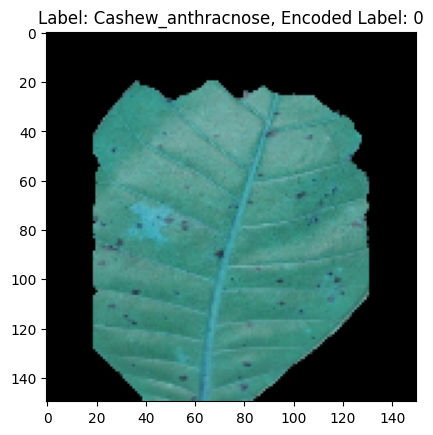

In [ ]:
plt.imshow(data[0])
plt.title(f"Label: {labels[0]}, Encoded Label: {encoded_labels[0]}")


Text(0.5, 1.0, 'Label: 20, Encoded Label: 20')

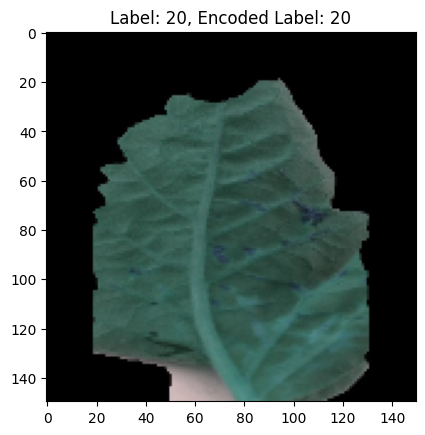

In [ ]:
plt.imshow(data[24000])
plt.title(f"Label: {labels[24000]}, Encoded Label: {labels[24000]}")

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test_encoded = encoder.fit_transform(y_test.reshape(-1, 1)).toarray()

NameError: ignored

In [ ]:
print('type of data :',type(data[0]))
print("Shape of the image :",data[0].shape)
print("type of the labels :",type(labels))
# print("type of the encoded labels :",type(encoded_labels))

type of data : <class 'numpy.ndarray'>
Shape of the image : (150, 150, 3)
type of the labels : <class 'numpy.ndarray'>


In [ ]:
print("The shape of x :",x.shape)
print("The shape of y :",y.shape)

The shape of x : (25103, 150, 150, 3)
The shape of y : (25103,)


In [ ]:
x,y = shuffle(x,y,random_state = 101)


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =101)

In [ ]:
type(x_train)

list

In [ ]:
y_train[0]

0

In [ ]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(64,activation = 'relu'))
model.add(Dense(22,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()

y_test_encoded = encoder.fit_transform(y_test.reshape(-1, 1)).toarray()

In [ ]:
# y_train = keras.utils.to_categorical(y_train, 21)
# y_test = keras.utils.to_categorical(y_test, 21)
# y_train

In [ ]:
print("The shape of x :",x.shape)
print("The shape of y :",y.shape)

The shape of x : (25103, 150, 150, 3)
The shape of y : (25103,)


In [ ]:
y_train_encoded[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [ ]:
history = model.fit(x_train,y_train_encoded,epochs = 30,validation_split=0.1)

Epoch 1/30
565/565 [==============================] - 25s 21ms/step - loss: 2.9120 - accuracy: 0.1648 - val_loss: 2.5435 - val_accuracy: 0.2434
Epoch 2/30
565/565 [==============================] - 11s 20ms/step - loss: 2.3321 - accuracy: 0.2829 - val_loss: 2.2052 - val_accuracy: 0.3255
Epoch 3/30
565/565 [==============================] - 11s 20ms/step - loss: 2.0209 - accuracy: 0.3674 - val_loss: 1.9305 - val_accuracy: 0.3902
Epoch 4/30
565/565 [==============================] - 12s 21ms/step - loss: 1.7857 - accuracy: 0.4244 - val_loss: 1.7390 - val_accuracy: 0.4505
Epoch 5/30
565/565 [==============================] - 11s 20ms/step - loss: 1.6026 - accuracy: 0.4788 - val_loss: 1.6552 - val_accuracy: 0.4629
Epoch 6/30
565/565 [==============================] - 11s 20ms/step - loss: 1.4541 - accuracy: 0.5211 - val_loss: 1.6360 - val_accuracy: 0.4853
Epoch 7/30
565/565 [==============================] - 11s 20ms/step - loss: 1.3425 - accuracy: 0.5570 - val_loss: 1.5791 - val_accuracy:

In [ ]:
model.save('/content/drive/MyDrive/Deep learning model/CNN_model_30epoch_47%')

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test_encoded)

# Print the accuracy
print(f"Test accuracy: {accuracy * 100:.2f}%")

157/157 [==============================] - 2s 10ms/step - loss: 2.9197 - accuracy: 0.5031
Test accuracy: 50.31%


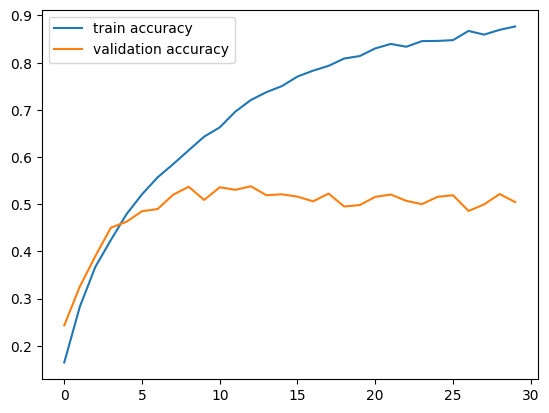

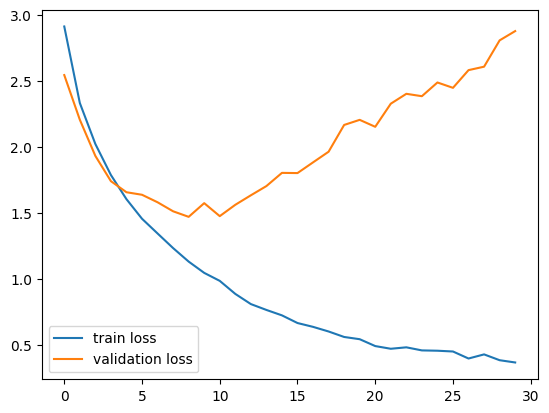

157/157 [==============================] - 1s 6ms/step
Accuracy: 0.5030870344552878
Precision: 0.477538491163143
Recall: 0.4638808643094268
F1 Score: 0.46548882329915564
157/157 [==============================] - 1s 6ms/step


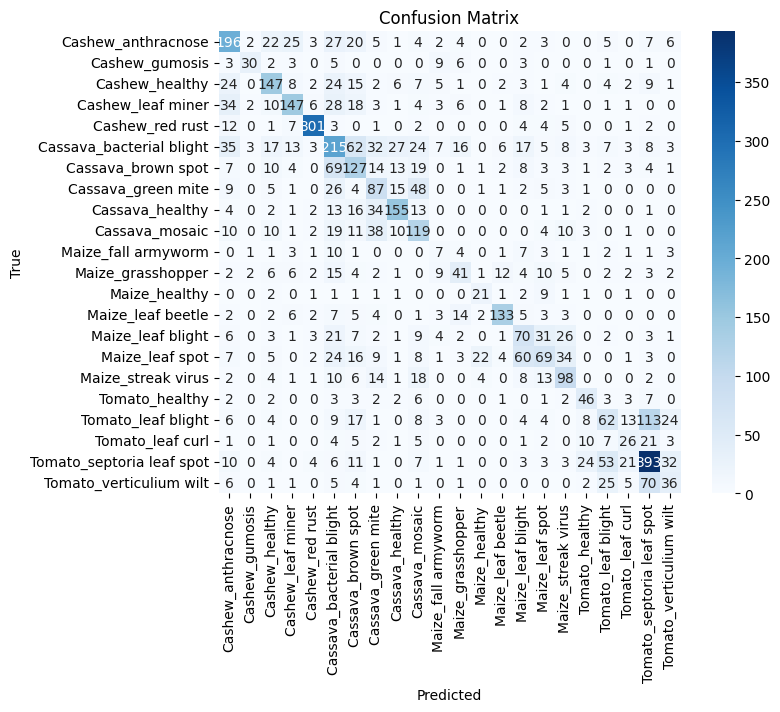

In [ ]:
output_checking()

In [ ]:
model.predict(np.expand_dims(x_test[0],axis=0)).round(2)

1/1 [==============================] - 1s 974ms/step


array([[0.04, 0.  , 0.02, 0.  , 0.  , 0.02, 0.02, 0.  , 0.  , 0.01, 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.15, 0.04, 0.43, 0.18]],
      dtype=float32)

In [ ]:
model.evaluate(x_test,y_test_encoded)

157/157 [==============================] - 4s 22ms/step - loss: 2.5309 - acc: 0.2593


[2.530916452407837, 0.25931090116500854]

2 vgg16

In [ ]:

from tensorflow.keras.applications import VGG16



# Load the VGG16 model with pre-trained weights
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Define classes and subclasses as before
# ...

# Load your data and labels
# ...


# # Preprocess the images to match VGG16 input requirements
# x_train_preprocessed = np.array([cv2.resize(image, (224, 224)) for image in x_train])
# x_val_preprocessed = np.array([cv2.resize(image, (224, 224)) for image in x_val])

# Preprocess labels
# y_train_categorical = to_categorical(y_train)
# y_val_categorical = to_categorical(y_val)
for layer in vgg_model.layers:
	layer.trainable = False
# Add classification layers on top of VGG16
flat_layer = Flatten()(vgg_model.output)
output_layer = Dense(22, activation='softmax')(flat_layer)

# Create a new model combining VGG16 and the classification layers
model = Model(inputs=vgg_model.input, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train_encoded, validation_split=0.1, epochs=10)

# # Save the model
# model.save('/kaggle/working/vgg16_model.h5')


58889256/58889256 [==============================] - 4s 0us/step
Epoch 1/10
565/565 [==============================] - 47s 75ms/step - loss: 7.4044 - accuracy: 0.5105 - val_loss: 7.5177 - val_accuracy: 0.5346
Epoch 2/10
565/565 [==============================] - 41s 73ms/step - loss: 3.5711 - accuracy: 0.7062 - val_loss: 7.5303 - val_accuracy: 0.6108
Epoch 3/10
565/565 [==============================] - 40s 71ms/step - loss: 2.6556 - accuracy: 0.7650 - val_loss: 7.9349 - val_accuracy: 0.6028
Epoch 4/10
565/565 [==============================] - 41s 72ms/step - loss: 2.0555 - accuracy: 0.8176 - val_loss: 8.7869 - val_accuracy: 0.5963
Epoch 5/10
565/565 [==============================] - 42s 75ms/step - loss: 1.6988 - accuracy: 0.8364 - val_loss: 9.2194 - val_accuracy: 0.6018
Epoch 6/10
565/565 [==============================] - 42s 75ms/step - loss: 1.5842 - accuracy: 0.8544 - val_loss: 10.5510 - val_accuracy: 0.6108
Epoch 7/10
565/565 [==============================] - 41s 73ms/step - 

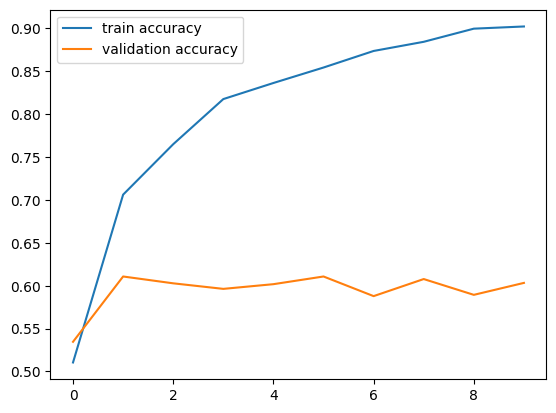

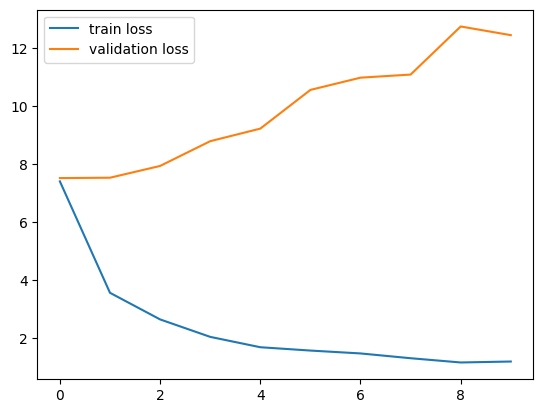

157/157 [==============================] - 12s 78ms/step
Accuracy: 0.6253734315873332
Precision: 0.6359144640849727
Recall: 0.6154774122662287
F1 Score: 0.6162423025122498
157/157 [==============================] - 10s 63ms/step


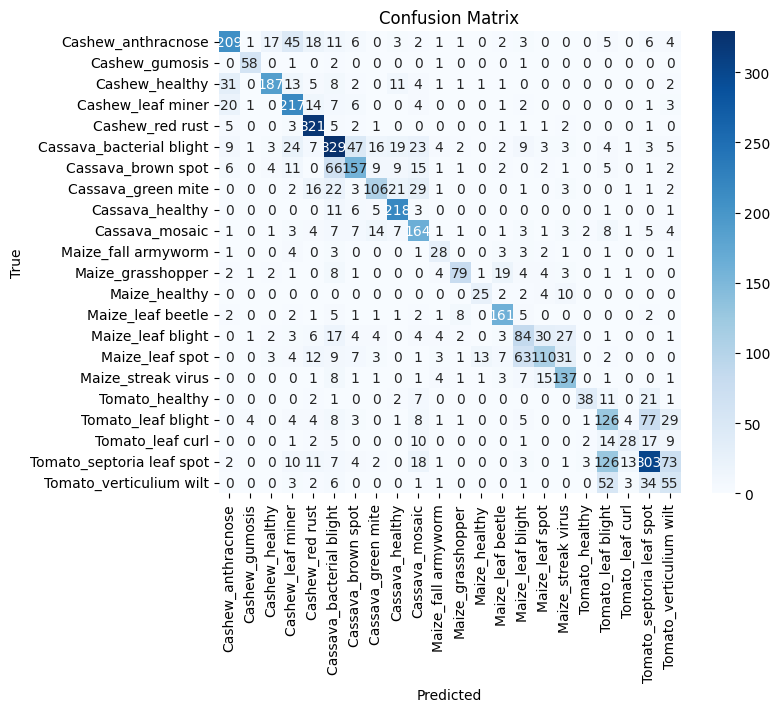

In [ ]:
output_checking()

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test_encoded)

# Print the accuracy
print(f"Test accuracy: {accuracy * 100:.2f}%")

157/157 [==============================] - 10s 64ms/step - loss: 12.3558 - accuracy: 0.6254
Test accuracy: 62.54%


In [ ]:
model.save('/content/drive/MyDrive/save model/vgg16_4crop_acc50%.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3 :inception v3

In [ ]:
model = None
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model

# Create the InceptionV3 model without top (fully connected layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Add your own classification layers on top of the InceptionV3 model
flat_layer = Flatten()(base_model.output)
output_layer = Dense(22, activation='softmax')(flat_layer)

# Create a new model combining InceptionV3 and the classification layers
model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train_encoded, validation_split=0.1, epochs=30)


87910968/87910968 [==============================] - 5s 0us/step
Epoch 1/30
565/565 [==============================] - 101s 111ms/step - loss: 1.9032 - accuracy: 0.4351 - val_loss: 2.3326 - val_accuracy: 0.3957
Epoch 2/30
565/565 [==============================] - 60s 106ms/step - loss: 1.2207 - accuracy: 0.5957 - val_loss: 1.6405 - val_accuracy: 0.6167
Epoch 3/30
565/565 [==============================] - 61s 108ms/step - loss: 0.9846 - accuracy: 0.6700 - val_loss: 1.6500 - val_accuracy: 0.5804
Epoch 4/30
565/565 [==============================] - 61s 109ms/step - loss: 0.8475 - accuracy: 0.7072 - val_loss: 1.3369 - val_accuracy: 0.6172
Epoch 5/30
565/565 [==============================] - 61s 108ms/step - loss: 0.8053 - accuracy: 0.7231 - val_loss: 0.9061 - val_accuracy: 0.6944
Epoch 6/30
565/565 [==============================] - 62s 110ms/step - loss: 0.7478 - accuracy: 0.7365 - val_loss: 1.3590 - val_accuracy: 0.6242
Epoch 7/30
565/565 [==============================] - 62s 110ms/

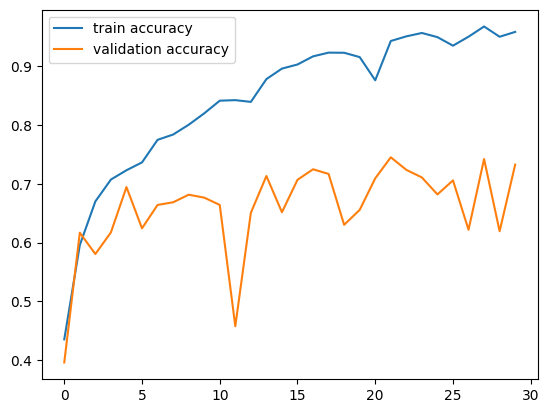

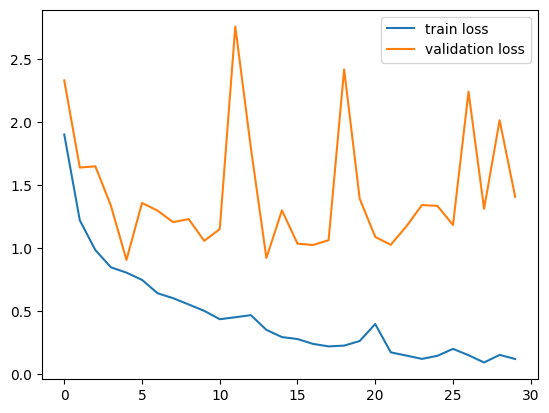

157/157 [==============================] - 7s 36ms/step
Accuracy: 0.7327225652260506
Precision: 0.7306453319102075
Recall: 0.7061254449675529
F1 Score: 0.7084320619479471
157/157 [==============================] - 4s 28ms/step


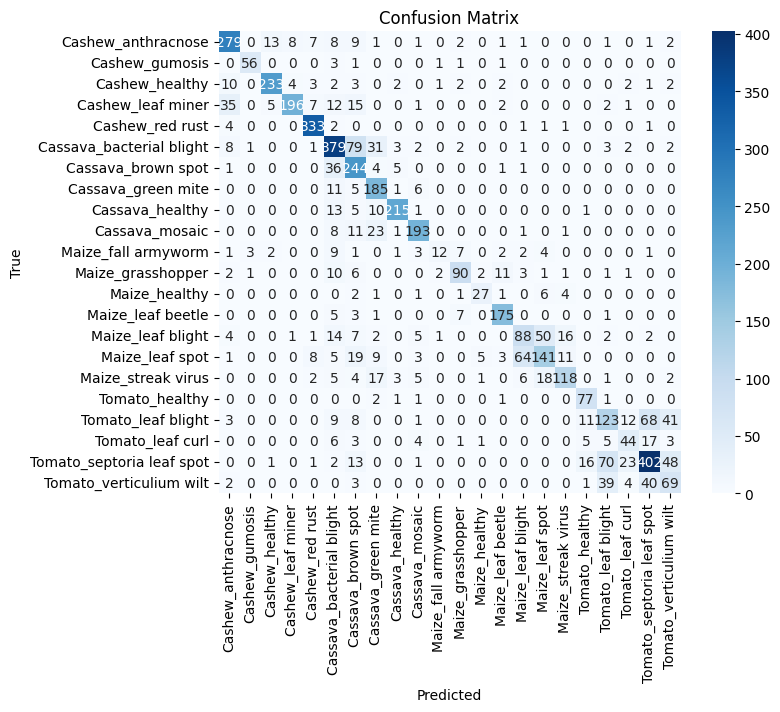

In [ ]:
output_checking()

In [ ]:
def grabcut_segmentation(image, rect):
    """
    Perform GrabCut segmentation on an input image.

    Args:
        image (numpy.ndarray): The input image.
        rect (tuple): A rectangle (x, y, width, height) specifying the region of interest (ROI).

    Returns:
        numpy.ndarray: The segmented image.
    """
    # Create a mask for initialization (0 for background, 1 for foreground)
    mask = np.zeros(image.shape[:2], np.uint8)

    # Initialize the background and foreground models
    bgdModel = np.zeros((1, 65), np.float64)
    fgdModel = np.zeros((1, 65), np.float64)

    # Apply GrabCut
    cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

    # Modify the mask to obtain the final result
    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

    # Multiply the image with the mask to get the segmented result
    segmented_image = image * mask2[:, :, np.newaxis]

    return segmented_image


In [ ]:
def prediction_grab_cut():
  predicted_Output = ['anthracnose', 'gumosis', 'healthy', 'leaf miner', 'red rust',
                      'bacterial blight', 'brown spot', 'green mite', 'healthy', 'mosaic',
                      'fall armyworm', 'grasshoper', 'healthy', 'leaf beetle', 'leaf blight', 'leaf spot', 'streak virus',
                      'healthy', 'leaf blight', 'leaf curl', 'septoria leaf spot', 'verticulium wilt']
  input_image_path = input("Give the image path :")
  img = cv2.imread(input_image_path)
  img = cv2.resize(img,(150,150))
  roi_rect = (50, 50, 300, 400)

  segmented_image = grabcut_segmentation(img, roi_rect)
  img_array = np.array(segmented_image)
  img_array = img_array.reshape(1,150,150,3)

  from tensorflow.keras.preprocessing import image
  plt.figure(figsize=(4,3))
  img = image.load_img(input_image_path)
  plt.imshow(img,interpolation='nearest')
  plt.axis('off')
  plt.show()

  a=model.predict(img_array)
  print("Probability of uninfected or infected",a)
  indices = a.argmax()
  print(indices)
  print(predicted_Output[indices])

Give the image path :/content/CCMT dataset(Grab_Cut)/CCMT dataset(Grab_Cut)/Cashew/healthy/healthy1001_.jpg


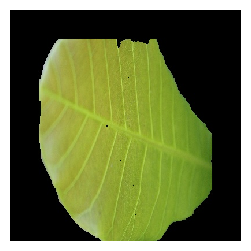

1/1 [==============================] - 0s 30ms/step
Probability of uninfected or infected [[3.00377961e-02 6.98468357e-05 1.81276113e-01 1.90590590e-01
  4.39065835e-03 1.19967133e-01 1.73517212e-01 1.01669729e-01
  5.81459925e-02 9.24384966e-03 1.52151007e-03 3.37829394e-03
  5.94212860e-03 8.62460956e-02 7.77918519e-03 1.76500622e-02
  8.22686683e-03 8.27715266e-05 7.34910864e-05 3.40393635e-05
  1.21184705e-04 3.54028962e-05]]
3
leaf miner


In [ ]:
prediction_grab_cut()